First lets import matplotlib(for ploting the images), MNIST dataset, and KNN

In [19]:
import matplotlib.pyplot as pt
from sklearn import datasets, metrics
from sklearn.neighbors import NearestNeighbors

Loading MNIST digit dataset

In [20]:
mnist= datasets.load_digits()

In [21]:
dataset = list(zip(mnist.images, mnist.target))

Making the dataset flat for feeding into the machine learning model

In [22]:
n_samples = len(mnist.images)
images = mnist.images.reshape((n_samples,-1))

Now building the classifier. Here the number of neighbors is set to 1

In [23]:
classifier = NearestNeighbors(n_neighbors=1)

Fitting the model with MNIST dataset.

In [24]:
classifier.fit(images[:n_samples//2],mnist.target[:n_samples//2])


NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=1, p=2, radius=1.0)

Now making predictions with test dataset

In [25]:
distances, indices = classifier.kneighbors(images[n_samples//2:])

Lets calculate the accuracy of the model.

In [26]:
acc = metrics.accuracy_score(mnist.target[n_samples//2:],indices)
print("accuracy = ",100-acc,"%")

accuracy =  99.9877641824 %


Now print first eight actual images and predictions of test dataset

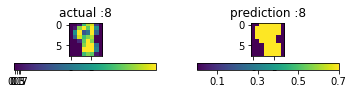

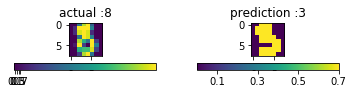

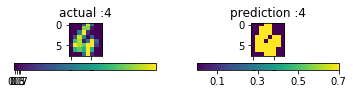

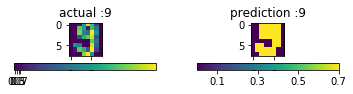

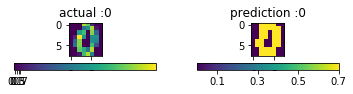

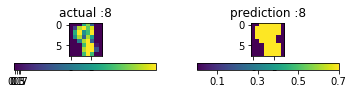

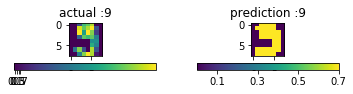

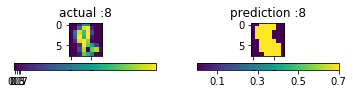

In [27]:
data = dataset[n_samples//2:]
for index, (image, label) in enumerate(data[:8]):
    fig = pt.figure()
    a = fig.add_subplot(4,2,1)
    imgplot = pt.imshow(image)
    a.set_title("actual :"+str(label))
    pt.colorbar(ticks = [0.1,0.3,0.5,0.7],orientation = 'horizontal')
    a = fig.add_subplot(4,2,2)
    current = indices[index][0]
    
    imgplot = pt.imshow(dataset[current][0])
    imgplot.set_clim(0.0,0.7)
    a.set_title("prediction :"+str(dataset[current][1]))
    pt.colorbar(ticks = [0.1,0.3,0.5,0.7], orientation = 'horizontal')
    pt.show()